<a href="https://colab.research.google.com/github/khoulouddder20/khoulouddder20/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Installing Tensorflow

%tensorflow_version 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [17]:
#importing libaries:

#import tensorflow.keras
from  keras.models import Sequential
from  keras.models import Model 
from  keras.layers import Dropout, Dense,Activation ,Flatten
from  keras.layers import Conv2D, MaxPool2D
from  keras.utils import np_utils
from  keras.datasets import mnist

import numpy as np
np.random.seed(123)

from matplotlib import pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)

(60000, 28, 28)


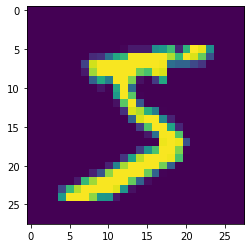

In [8]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [9]:
X_train =X_train.reshape(X_train.shape[0],28,28,1)
X_test =X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [10]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')
X_train /= 255
X_test /= 255
print(y_train.shape)

(60000,)


In [13]:
Y_train= np_utils.to_categorical(y_train,10)
Y_test= np_utils.to_categorical(y_test,10)
print(Y_train.shape)

(60000, 10)


In [22]:
#My Model:

Model=Sequential()
  
Model.add(Conv2D(filters = 6, kernel_size = (5,5), padding='same', strides=(1, 1), activation ='relu', input_shape = (28,28,1)))
Model.add(MaxPool2D (pool_size=(2,2) , strides=(2, 2)))
Model.add(Dropout(0.25))


Model.add(Conv2D(filters = 6, kernel_size = (5,5), padding='same', strides=(1, 1), activation ='relu', input_shape = (28,28,1)))
Model.add(MaxPool2D (pool_size=(2,2) , strides=(2, 2)))
Model.add(Dropout(0.5))

Model.add(Flatten())

Model.add(Dense(120, activation = "relu"))
Model.add(Dense(84, activation = "relu"))
Model.add(Dense(10, activation = "softmax"))

In [24]:
#Compile the Model:
Model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Output Model structure
Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 6)         906       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 6)          0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 6)          

In [25]:
#Fit the Model:
Model.fit(X_train , Y_train,
           batch_size=16,
           epochs=5,
           verbose=1,
           validation_data=(X_test , Y_test))

Epoch 1/5
3750/3750 [==============================] - 22s 4ms/step - loss: 0.3668 - accuracy: 0.8813 - val_loss: 0.0947 - val_accuracy: 0.9699
Epoch 2/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1874 - accuracy: 0.9406 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 3/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1577 - accuracy: 0.9494 - val_loss: 0.0628 - val_accuracy: 0.9825
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1397 - accuracy: 0.9558 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 5/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1302 - accuracy: 0.9587 - val_loss: 0.0464 - val_accuracy: 0.9860


In [26]:
#Evaluate Model :
score = Model.evaluate(X_test , Y_test, verbose=1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9860
Val loss: 0.04642537608742714
Val accuracy: 0.9860000014305115
